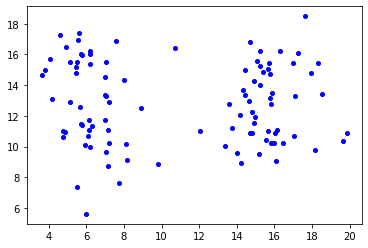

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
import sklearn

N = 100
mean1 = [6, 15]
mean2 = [6, 11]
mean3 = [16,15] 
mean4 = [16,11] 
cov = [[2, 0], [0, 2]] 
np.random.seed(50)
X = np.random.multivariate_normal( mean1, cov, int(N/4))
X = np.concatenate ((X, np.random.multivariate_normal ( mean2, cov, int(N/4)))) 
X = np.concatenate ((X, np.random.multivariate_normal ( mean3, cov, int(N/4)))) 
X = np.concatenate ((X, np.random.multivariate_normal ( mean4, cov, int(N/4)))) 
plt.plot(X[:,0],X[:,1],'ob',ms=4)


# Use function just for checking my answer

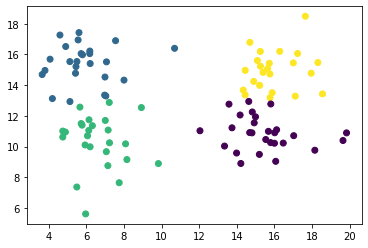

In [3]:
from sklearn.cluster import KMeans
import numpy as np
y_pred = KMeans(n_clusters=4,max_iter=50, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()


# Question1 Kmeans

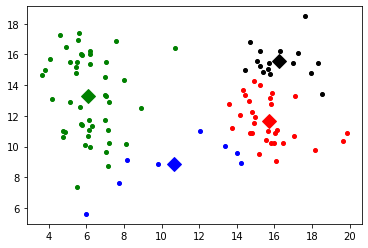

SSE for red , blue , green , black cluster
[269.92919235 190.28436923 511.51944619 213.89375964]
1185.6267674158096


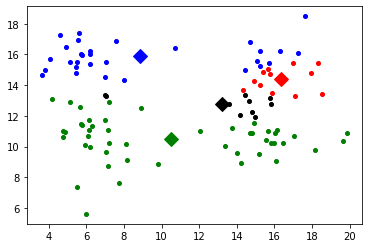

SSE for red , blue , green , black cluster
[  41.734692   1937.91017747 2212.33469897  142.11920068]
4334.098769115604


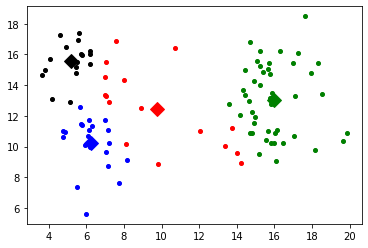

SSE for red , blue , green , black cluster
[233.47394925 115.88673479 795.79522763 161.31451361]
1306.4704252749816


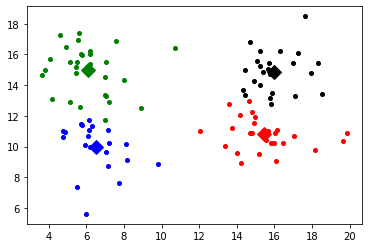

SSE for red , blue , green , black cluster
[199.96989047  97.03057998 303.74816169 123.11881249]
723.8674446241564


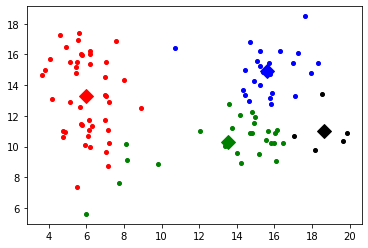

SSE for red , blue , green , black cluster
[452.88817205 120.92860847 286.40567451  20.30905396]
880.531508997115


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

def euclDistance(vector1, vector2):
    return np.sqrt(sum((vector2 - vector1)**2))

# init centroids with random samples
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape
    centroids = np.zeros((k, dim))
    for i in range(k):
        index = int(random.uniform(0,numSamples))
        centroids[i, :] = dataSet[index, :]
    return centroids

# k-means cluster
def kmeans(dataSet,k,max_iter):
    numSamples = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((numSamples, 2)))
    clusterChanged = True
    centroids = initCentroids(dataSet, k)
    time=0
    while (clusterChanged and time<max_iter):
        clusterChanged = False
        time=time+1
        for i in range(numSamples):
            minDist  = 100000.0
            minIndex = 0

            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist  = distance
                    minIndex = j
    ## step 3: update its cluster
            clusterAssment[i,0] = minIndex
            clusterAssment[i,1] = minDist**2
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True

        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)


    return centroids, clusterAssment


def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex],ms=4)

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 10)
    plt.show()


def SSEcompute(k,clusterAssment):
    sse=np.zeros(k)
    samplenumber,dim=clusterAssment.shape
    for j in range (0,k):
        for i in range (0,samplenumber):
            if(int(clusterAssment[i,0])==j):
                sse[j]=sse[j]+clusterAssment[i,1]
                
    return sse 
    


for i in range(5):
    centroids, clusterAssment = kmeans(X, 4,max_iter=50)
    showCluster(X, 4, centroids, clusterAssment)
    SSE=SSEcompute(4,clusterAssment)
    print("SSE for red , blue , green , black cluster")
    print(SSE)
    ssesum=sum(SSE)
    print(ssesum)


# We have conducted five kmeans clustering above. You can find that sometimes the clustering results are very successful, but sometimes the error is quite bad. For example, in the fourth clustering, the overall and local SSE are relatively small. In the second clustering, the clustering results are very chaotic. This is due to the initial selection of the clustering center point.

# Question2 Kmeans++

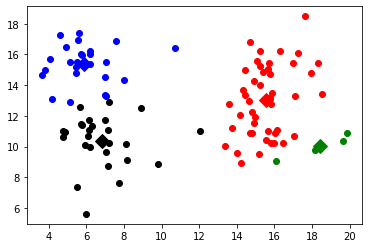

SSE for red , blue , green , black cluster
[417.79228597 110.7151164   17.58195993 143.06719581]
689.1565581097268


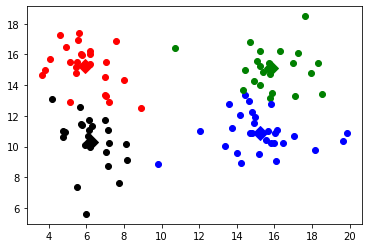

SSE for red , blue , green , black cluster
[210.06881831 447.39706426 194.12330775 115.12078282]
966.7099731289999


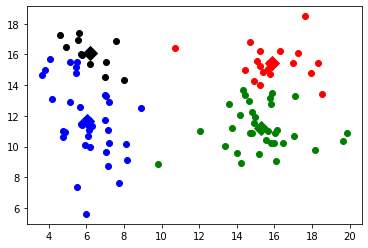

SSE for red , blue , green , black cluster
[ 80.47146619 812.56840246 201.23095798  50.42457668]
1144.6954033038685


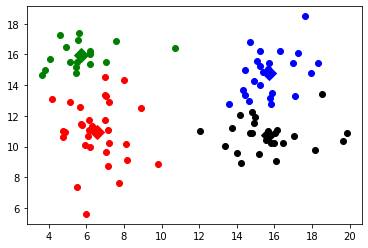

SSE for red , blue , green , black cluster
[297.57166603 104.97827637  59.46932881 117.72159133]
579.7408625466543


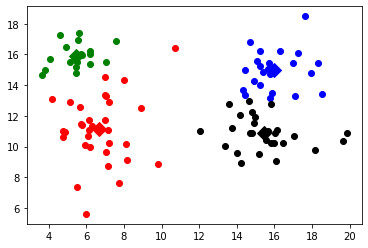

SSE for red , blue , green , black cluster
[322.08221782 111.13588437  48.33284032 163.385274  ]
644.9362165042194


In [5]:
import random
def nearest(dataSet, centroids):
    min_dist = 100000.0
    numSamples = centroids.shape[0]
    for i in range(numSamples):
        d = euclDistance(dataSet, centroids[i, ])
        if min_dist > d:
            min_dist = d
    return min_dist

def initCentroidsplusplus(dataSet, k):
    numSamples, dim = np.shape(dataSet)
    centroids = np.zeros((k , dim))
    index = np.random.randint(0, numSamples)
    centroids[0,] = dataSet[index, ]
    d = np.zeros(numSamples)
    for i in range(1, k):
        sum_all = 0
        for j in range(numSamples):
            d[j] = nearest(dataSet[j, ], centroids[0:i, ])
            sum_all += d[j]
        sum_all *= random.random()
        for j, di in enumerate(d):
            sum_all=sum_all - di
            if sum_all > 0:
                continue
            centroids[i,] = dataSet[j, ]
            break
    return centroids




# k-means++ cluster
def Kmeansplusplus(dataSet,k,max_iter):
    numSamples = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((numSamples, 2)))
    clusterChanged = True
    centroids = initCentroidsplusplus(dataSet, k)
    time=0
    while (clusterChanged and time<max_iter):
        clusterChanged = False
        time=time+1
        for i in range(numSamples):
            minDist  = 100000.0
            minIndex = 0

            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist  = distance
                    minIndex = j
            clusterAssment[i,0] = minIndex
            clusterAssment[i,1] = minDist**2
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True

        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)


    return centroids, clusterAssment


def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex],ms=6)

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 10)
    plt.show()


def SSEcompute(k,clusterAssment):
    sse=np.zeros(k)
    samplenumber,dim=clusterAssment.shape
    for j in range (0,k):
        for i in range (0,samplenumber):
            if(int(clusterAssment[i,0])==j):
                sse[j]=sse[j]+clusterAssment[i,1]
                
    return sse 
    

for i in range(5):
    centroids, clusterAssment = Kmeansplusplus(X, 4,max_iter=50)
    showCluster(X, 4, centroids, clusterAssment)
    SSE=SSEcompute(4,clusterAssment)
    print("SSE for red , blue , green , black cluster")
    print(SSE)
    ssesum=sum(SSE)
    print(ssesum)



# We have conducted five kmeans++ clustering above, and you can find that the overall clustering results are relatively similar. There is no huge difference between the overall and local SSE of the five clusterings. This is because the initial kmeans + + algorithm selects the cluster center point to ensure that each center point is far enough for each other.

# Q3

# Qualitatively speaking, the only difference between kmeans + + and kmeans lies in the selection of initial clustering centers. The former can ensure the distance between each cluster center is far engough, so it can often achieve better clustering

# Quantitatively speaking, through the comparison of SSE, we find that most of the cluster’s SSE generated by kmeans + + is smaller than that generated by kmeans algorithm, which proves that kmeans + + algorithm can indeed get better clustering results